In [3]:
import numpy as np
import pandas as pd
import scipy.stats as st

import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
data = df.dropna()

In [9]:
data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

###### What genre game have been the most

In [10]:
data['Genre'].value_counts()

Genre
Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: count, dtype: int64

<Axes: xlabel='Genre', ylabel='count'>

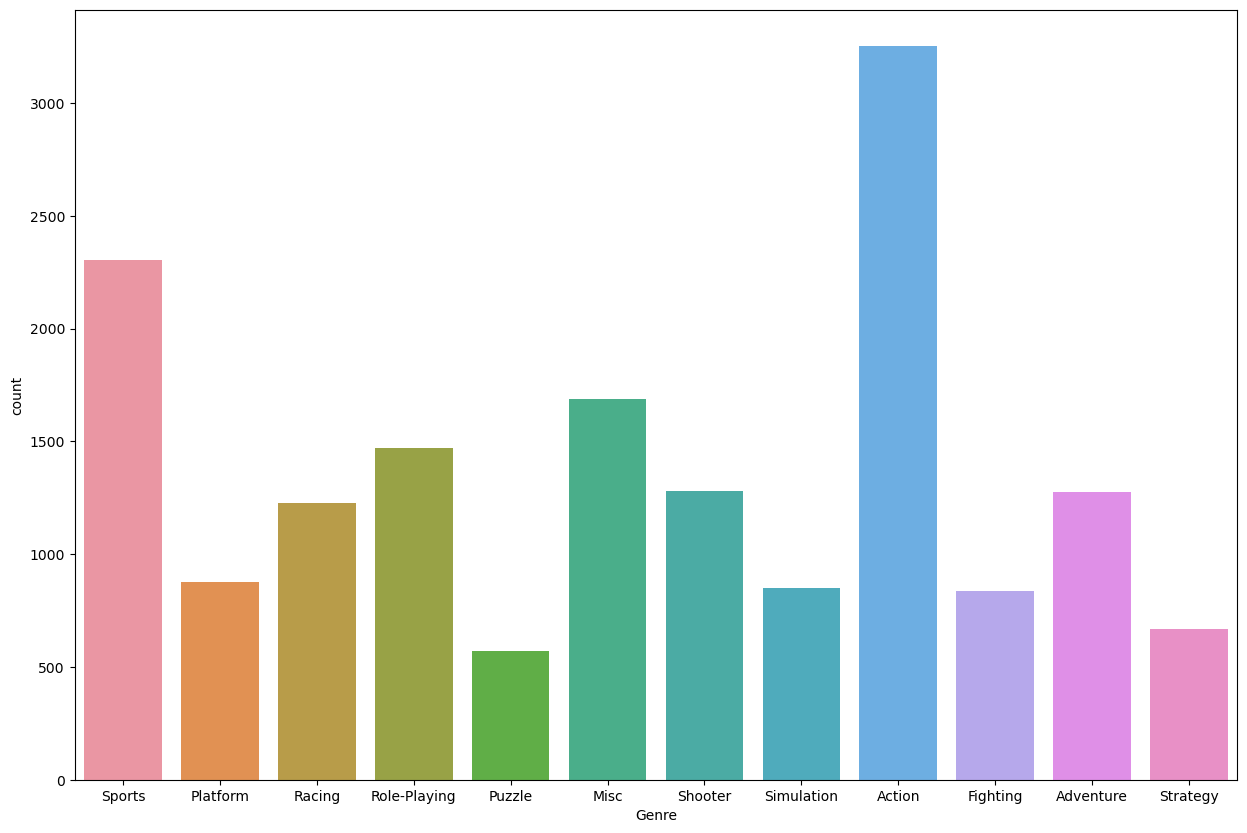

In [11]:
plt.figure(figsize=(15,10))
sns.countplot(x='Genre',data=data)

###### Which year had most game release

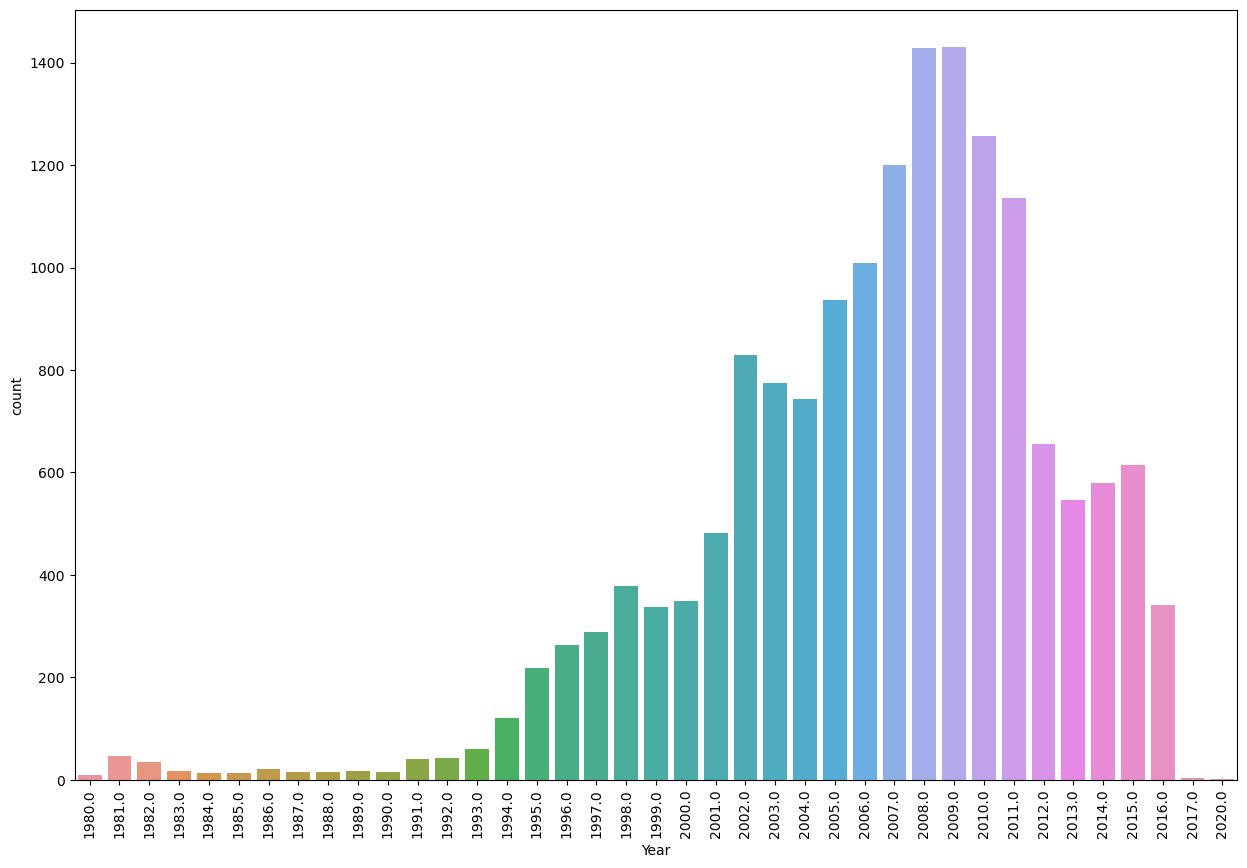

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(x='Year',data=data)
plt.xticks(rotation=90);

###### Top 5 years games release by genre

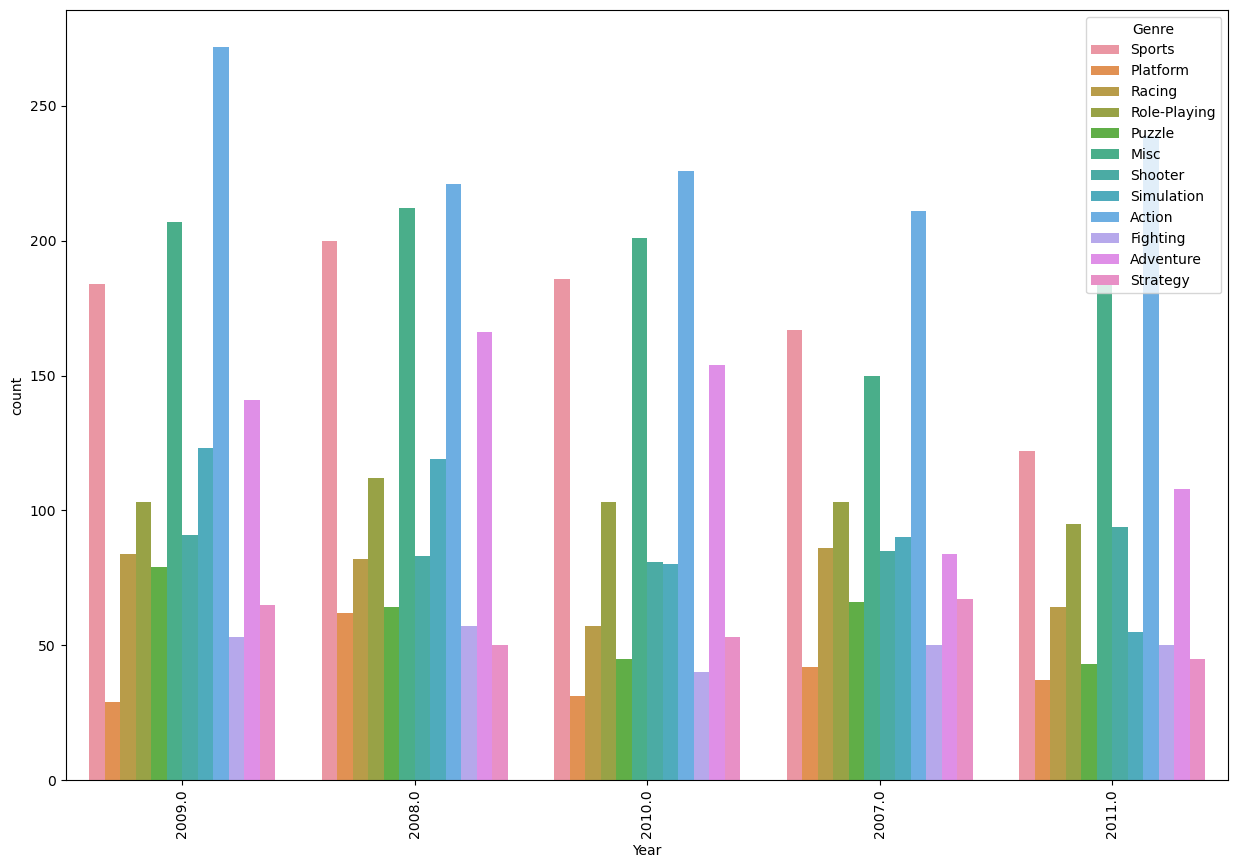

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(x='Year',data=data, hue = 'Genre',order= data['Year'].value_counts().iloc[:5].index)
plt.xticks(rotation=90);

###### Which year had the highest sales worldwide?

In [22]:
data_year = data.groupby(by=['Year'])['Global_Sales'].sum().reset_index()

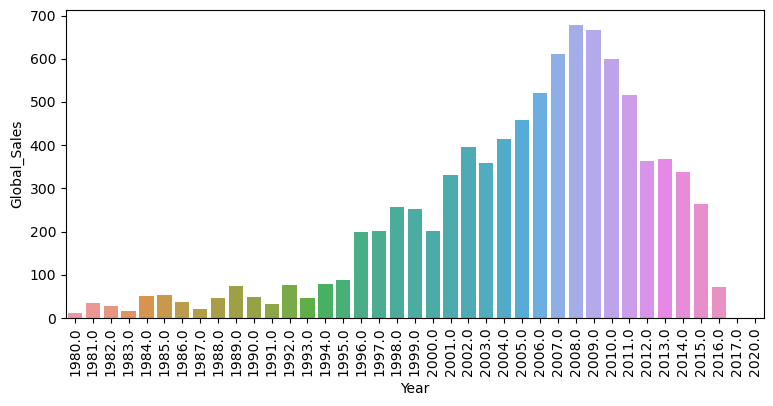

In [26]:
plt.figure(figsize=(9,4))
sns.barplot(x='Year',data=data_year, y = 'Global_Sales')
plt.xticks(rotation=90);

###### Which genre game has been released the most in a single year

In [32]:
year_max_df = data.groupby(['Year','Genre']).size().reset_index(name='count')

year_max_idx = year_max_df.groupby(['Year'])['count'].transform('max') == year_max_df['count']

In [39]:
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=['Year','count'],keep='last').reset_index(drop=True)

In [42]:
genre = year_max_genre["Genre"].values

In [46]:
year_max_genre['count'].values

array([  4,  25,  18,   7,   3,   4,   6,   4,   4,   5,   3,   7,   7,
        11,  22,  29,  52,  46,  70,  62,  81,  96, 188, 144, 125, 192,
       184, 211, 221, 272, 226, 239, 265, 148, 186, 255, 118,   2,   1])

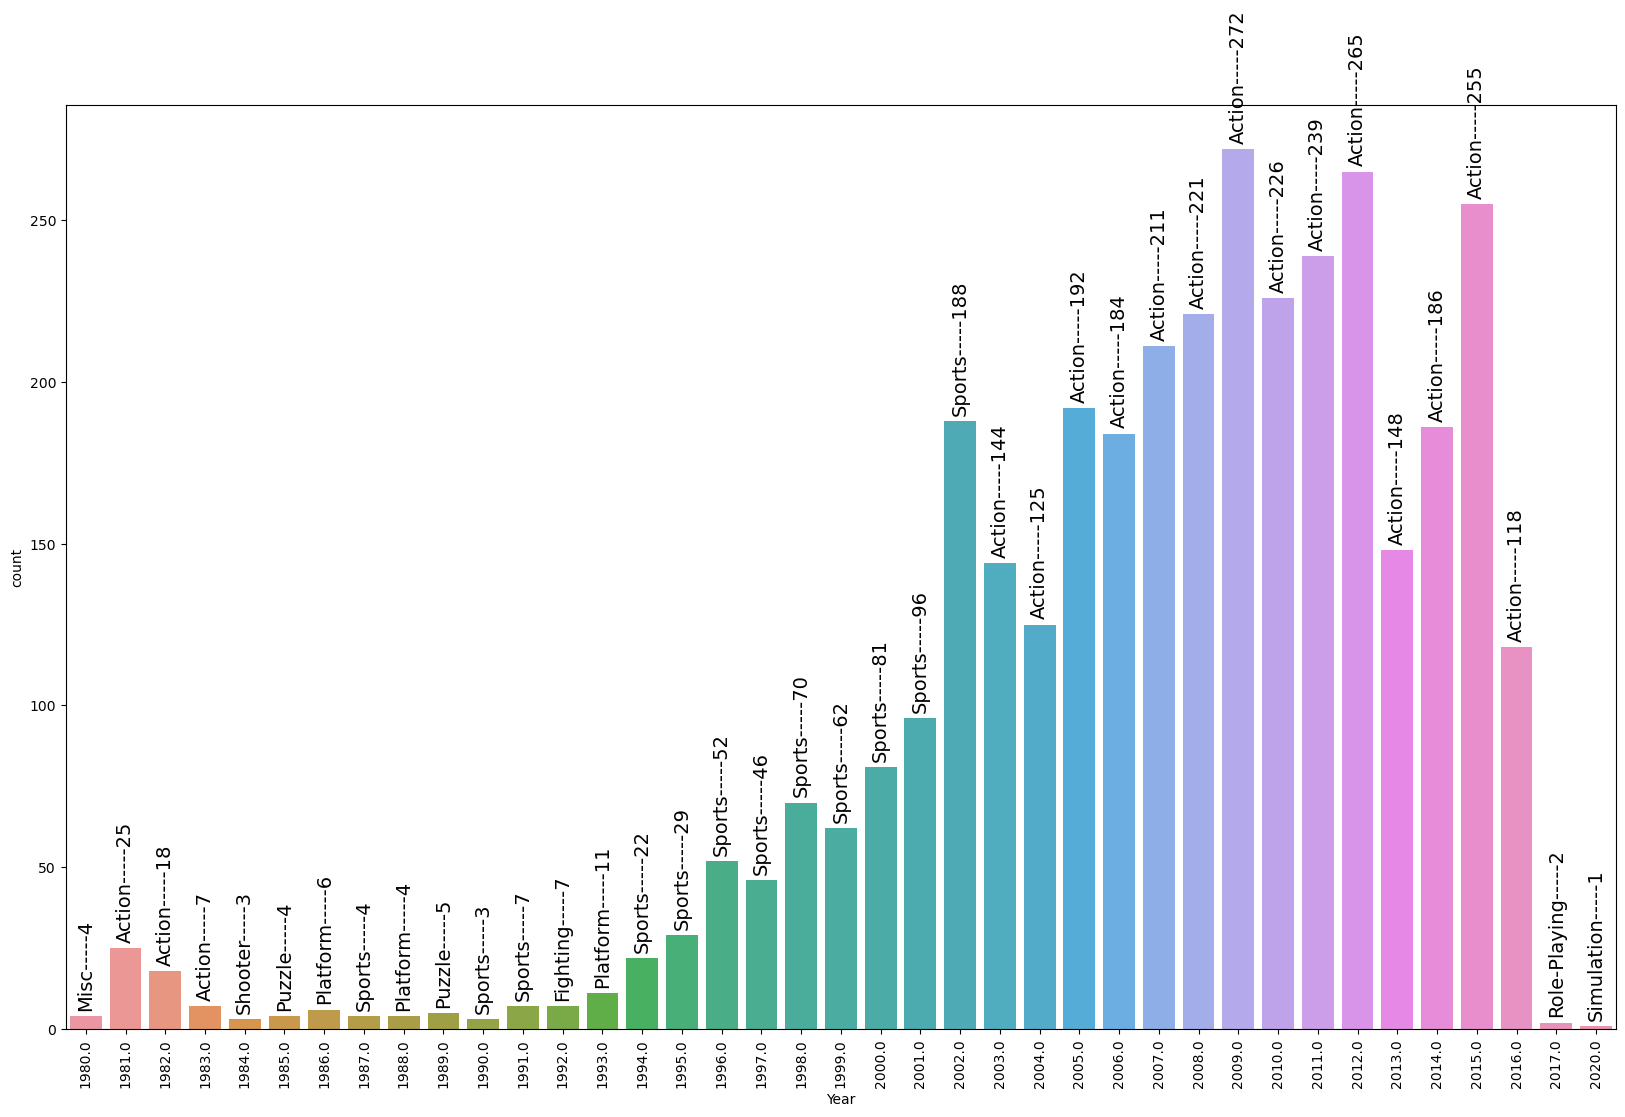

In [60]:
plt.figure(figsize=(20,12))
g = sns.barplot(x="Year",y="count",data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:
    g.text(index,value+3, str(genre[index] + '-----' + str(value)),rotation = 90, size = 14, ha='center')
    index += 1

    

plt.xticks(rotation=90)
plt.show()

###### Which genre game has sold the most in a single year

In [65]:
year_sale_dx = data.groupby(['Year','Genre'])['Global_Sales'].sum().reset_index()

year_sale = year_sale_dx.groupby(['Year'])['Global_Sales'].transform('max') == year_sale_dx['Global_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)

In [67]:
genre = year_sale_max['Genre']

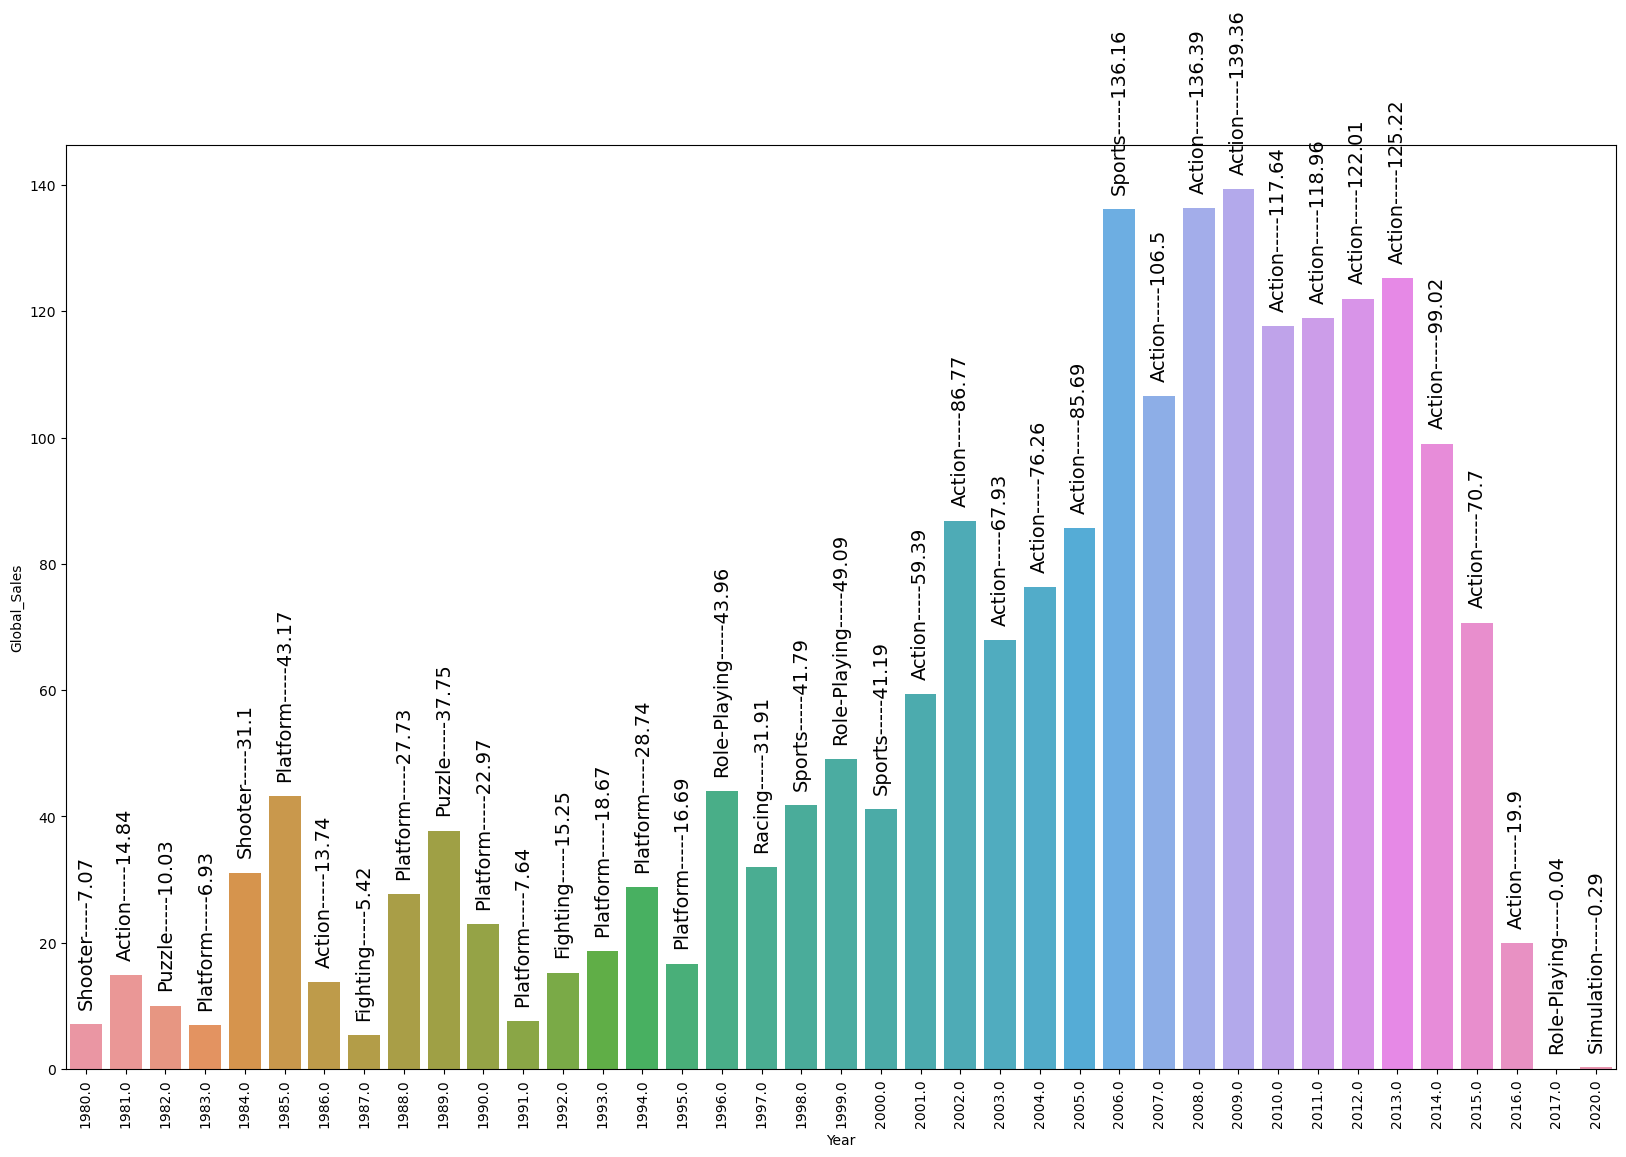

In [68]:
plt.figure(figsize=(20,12))
g = sns.barplot(x="Year",y="Global_Sales",data=year_sale_max)
index = 0
for value in year_sale_max['Global_Sales']:
    g.text(index,value+3, str(genre[index] + '-----' + str(round(value,2))),rotation = 90, size = 14, ha='center')
    index += 1

    

plt.xticks(rotation=90)
plt.show()

###### genre having the most price globally

In [75]:
data_genre = data.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index().sort_values(by=['Global_Sales'],ascending=False)
data_genre

,Genre,Global_Sales
0,Action,1722.84
10,Sports,1309.24
8,Shooter,1026.20
7,Role-Playing,923.83
4,Platform,829.13
3,Misc,789.87
6,Racing,726.76
2,Fighting,444.05
9,Simulation,389.98
5,Puzzle,242.21


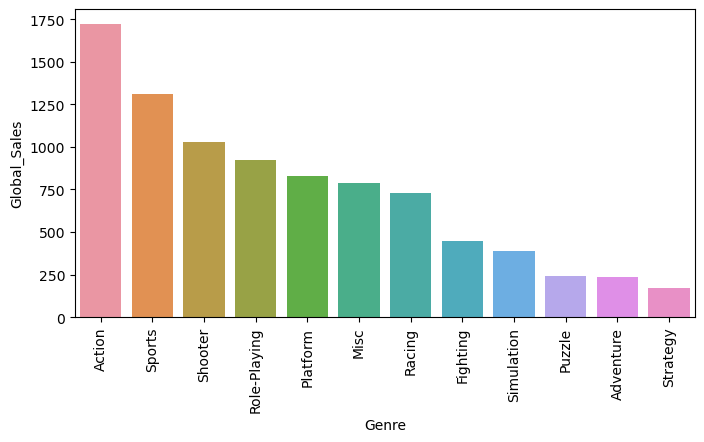

In [77]:
plt.figure(figsize=(8,4))
sns.barplot(x="Genre",y='Global_Sales',data=data_genre)
plt.xticks(rotation=90)
plt.show()

###### platform having the most price globally

In [78]:
data_platform = data.groupby(by=['Platform'])['Global_Sales'].sum()
data_platform = data_platform.reset_index().sort_values(by=['Global_Sales'],ascending=False)
data_platform

,Platform,Global_Sales
16,PS2,1233.46
28,X360,969.60
17,PS3,949.35
26,Wii,909.81
4,DS,818.91
15,PS,727.39
6,GBA,305.62
19,PSP,291.71
18,PS4,278.10
13,PC,254.70


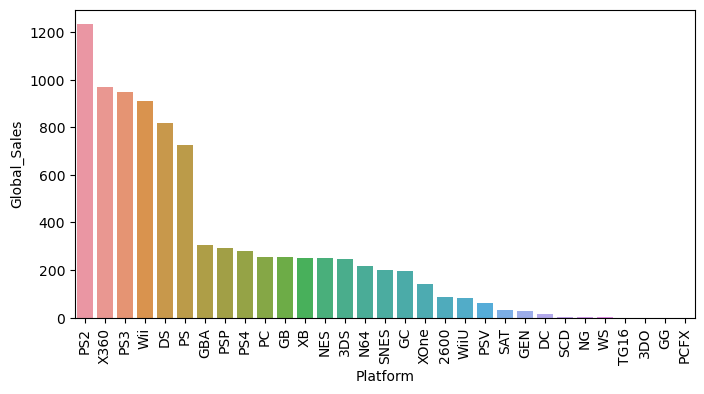

In [79]:
plt.figure(figsize=(8,4))
sns.barplot(x="Platform",y='Global_Sales',data=data_platform)
plt.xticks(rotation=90)
plt.show()